# Apply NN on CIFAR10

In the previous notebook, we have introduced NNs to fit some 2d toy-examples and NNs can classify non-linear separable data perfectly. In this notebook, we would like to try NNs on CIFAR10 to measure it's performance against Linear classifier.

First, let's load modules and CIFAR10-dataset

In [81]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import time

%matplotlib inline
%config InlineBackend.figure_format = 'retina'
plt.rcParams['figure.figsize'] = (5.0, 5.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# append common path
import sys
COMMON_PATH = '../common'
if COMMON_PATH not in sys.path:
    sys.path.insert(0, COMMON_PATH)
    
# for auto-reloading extenrnal modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

from data_utils import download_file_to_cwd, untar_to_cwd

url = 'http://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz'
filename = 'cifar-10-python.tar.gz'

# download data to current directory
download_file_to_cwd(url, filename)

# untar the data
cifar10_dir = 'cifar-10-batches-py'
untar_to_cwd(filename, cifar10_dir)

# load data to memory
from cifar10_input import load_flatten_CIFAR10, show_img

# since NNs explicit create the biase, we don't need to append one to input
data = load_flatten_CIFAR10(cifar10_dir, append_one = False)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
http://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz is downloaded to ./cifar-10-python.tar.gz
./cifar-10-python.tar.gz is untar to ./cifar-10-batches-py


# Visualize data
We look at input data shape so that we can build NNs

In [82]:
for k in data:
    print ('{:<15s} has shape: {}'.format(k, data[k].shape))

X_train     = data['X_train']  
y_train     = data['y_train']
mean_images = data['mean_images']

X_val       = data['X_val']  
y_val       = data['y_val']

X_test      = data['X_test']
y_test      = data['y_test']
N = X_train.shape[0]

X_train         has shape: (49000, 3072)
y_train         has shape: (49000,)
mean_images     has shape: (3072,)
X_val           has shape: (1000, 3072)
y_val           has shape: (1000,)
X_test          has shape: (10000, 3072)
y_test          has shape: (10000,)


The data is flatten image input which is already normalized (minus mean image). We can visualize a random image as following

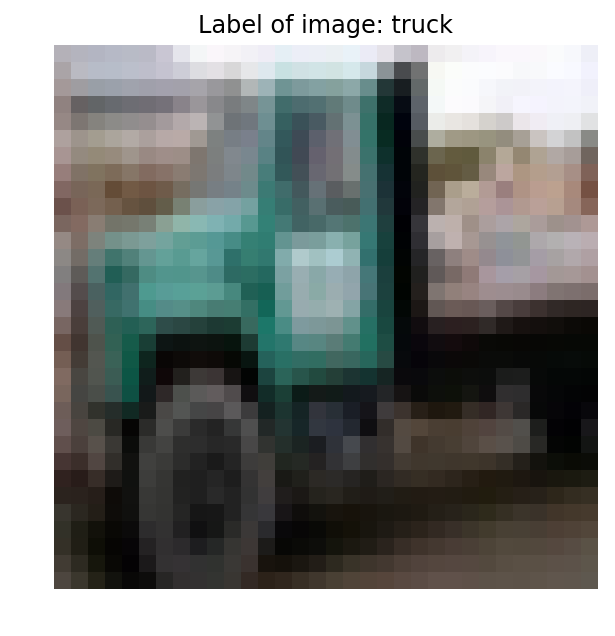

In [84]:
idx = np.random.randint(N)
show_img(X_train[idx] + mean_images, y_train[idx])

## Build NNs
To classify CIFAR-10, we try NNs with one hidden-layer with ReLU activation. We re-use the object **FullyConnectedNN** from previous notebook

In [96]:
from nn_fc_layers import FullyConnectedNN

hidden_dims = [200]
fcnn = FullyConnectedNN(hidden_dims, 
                        input_dim = X_train.shape[1], num_classes = 10, 
                        reg = 0.3, learning_rate = 1e-3, lr_decay = .95, weight_scale = 1e-3,
                        act_fn = tf.nn.relu)

## Train NNs
We are ready to train our NNs on CIFAR-10

In [98]:
batch_size = 256
epochs = 20
fitted_params = fcnn.train(X_train, y_train, batch_size, epochs, X_val, y_val, print_every=200)

    0 iter loss =     2.3673 acc = 14.40
  200 iter loss =     1.7178 acc = 41.40
  400 iter loss =     1.6220 acc = 45.30
  600 iter loss =     1.5477 acc = 47.50
  800 iter loss =     1.5216 acc = 49.70
 1000 iter loss =     1.4782 acc = 49.40
 1200 iter loss =     1.4873 acc = 49.50
 1400 iter loss =     1.4642 acc = 51.70
 1600 iter loss =     1.4317 acc = 52.60
 1800 iter loss =     1.4677 acc = 50.40
 2000 iter loss =     1.4498 acc = 51.40
 2200 iter loss =     1.4545 acc = 51.90
 2400 iter loss =     1.4351 acc = 51.40
 2600 iter loss =     1.4599 acc = 51.90
 2800 iter loss =     1.4587 acc = 52.20
 3000 iter loss =     1.4262 acc = 54.00
 3200 iter loss =     1.4459 acc = 51.60
 3400 iter loss =     1.4514 acc = 51.90
 3600 iter loss =     1.4390 acc = 53.90
 3800 iter loss =     1.4408 acc = 53.60
 3819 iter loss =     1.4518 acc = 52.80


## NNs performance
Let's measure the accuracy of our NNs on the test-dataset

In [99]:
pred = fcnn.predict(fitted_params, X_test)
print ('Prediction accuracy on test set = {:5.2f}%'.format(100 * np.mean(pred == y_test)))

Prediction accuracy on test set = 52.76%


# Conclusion

We can see that NNs outperform Linear classifier (Lc), it achives > 50% on test-set vs. 33% of Lc. This proves that NNs can capture non-linearity of our image which helps in classification. However accuracy of 50% is still pretty slow. We will soon see with CNNs, we can achive much higher accuracy.